<a href="https://colab.research.google.com/github/emirhneks/YapayZekaVeMakineOgrenmesi11/blob/main/Sinav3/Sinav3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opencv-python-headless
!pip install pytesseract
!pip install matplotlib
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,640 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

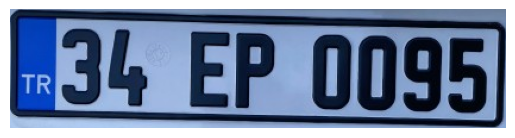

Okunan plaka: E34 EP 0095]



In [4]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Görüntüyü yükle
image_path = "fotograf.jpg"
image = cv2.imread(image_path)

# Görüntü dosyasının düzgün şekilde yüklenip yüklenmediğini kontrol et
if image is None:
    print(f"Error: Görüntü dosyası {image_path} yüklenemedi. Lütfen dosya yolunu kontrol edin.")
else:
    # Gri tonlamaya dönüştür
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Görüntüdeki gürültüyü azaltmak için GaussianBlur uygula
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Kenarları tespit et (Canny Edge Detection)
    edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

    # Konturları tespit et
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Plaka bölgesini belirlemek için uygun konturu seç
    plate_image = None

    # Konturları döngüyle incele
    for contour in contours:
        area = cv2.contourArea(contour)

        # Alanı belirli bir eşikten büyükse (plaka bölgesi)
        if area > 500:
            x, y, w, h = cv2.boundingRect(contour)

            # Plaka bölgesini kırp
            plate_image = image[y : y + h, x : x + w]

            # Kırpılmış plaka görüntüsünü RGB formatına çevir ve göster
            plate_image_rgb = cv2.cvtColor(plate_image, cv2.COLOR_BGR2RGB)
            plt.imshow(plate_image_rgb)
            plt.axis("off")
            plt.show()

            # İlk uygun konturu bulduktan sonra döngüden çık
            break

    # Eğer plaka tespit edilmediyse hata mesajı göster
    if plate_image is None:
        print("Plaka bölgesi tespit edilemedi.")
    else:
        # Plaka tespit edilmişse, OCR ile yazıyı oku
        plate_text = pytesseract.image_to_string(plate_image, config="--psm 8")
        print("Okunan plaka:", plate_text)